In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("F:/Machine and Deep Learning/IPL/cricsheet/Datasets/updation1(23-24).csv")
df.head()

C:\Users\ketan\AppData\Local\Temp\ipykernel_11204\1054826397.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("F:/Machine and Deep Learning/IPL/cricsheet/Datasets/updation1(23-24).csv")


,Unnamed: 0,ID,Venue,Date,Match No.,Innings,Over,Striker,Non Striker,Bowler,...,Bowler_ID,Venue_ID,Striker_ID,Innings_ID,Bowl_style_ID,Over_Number,Ball_Number,Rolling_Avg_Runs,Batsman_Bowler_Combo,Strike_Rate
0,0,124255,"MA Chidambaram Stadium, Chepauk, Chennai",5/26/2024,Unknown Match,Kolkata Knight Riders,0.1,Rahmanullah Gurbaz,SP Narine,B Kumar,...,23,7,177,3,11,0,1,0.000000,2087,1.1
1,1,124256,"MA Chidambaram Stadium, Chepauk, Chennai",5/26/2024,Unknown Match,Kolkata Knight Riders,0.2,Rahmanullah Gurbaz,SP Narine,B Kumar,...,23,7,177,3,11,0,2,2.000000,2087,1.1
2,2,124257,"MA Chidambaram Stadium, Chepauk, Chennai",5/26/2024,Unknown Match,Kolkata Knight Riders,0.3,Rahmanullah Gurbaz,SP Narine,B Kumar,...,23,7,177,3,11,0,3,1.333333,2087,1.1
3,3,124258,"MA Chidambaram Stadium, Chepauk, Chennai",5/26/2024,Unknown Match,Kolkata Knight Riders,0.4,Rahmanullah Gurbaz,SP Narine,B Kumar,...,23,7,177,3,11,0,4,1.000000,2087,1.1
4,4,124259,"MA Chidambaram Stadium, Chepauk, Chennai",5/26/2024,Unknown Match,Kolkata Knight Riders,0.5,Rahmanullah Gurbaz,SP Narine,B Kumar,...,23,7,177,3,11,0,5,0.800000,2087,1.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34966 entries, 0 to 34965
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            34966 non-null  int64  
 1   ID                    34966 non-null  int64  
 2   Venue                 34966 non-null  object 
 3   Date                  34966 non-null  object 
 4   Match No.             34966 non-null  object 
 5   Innings               34966 non-null  object 
 6   Over                  34966 non-null  float64
 7   Striker               34966 non-null  object 
 8   Non Striker           34966 non-null  object 
 9   Bowler                34966 non-null  object 
 10  Batter Runs           34966 non-null  int64  
 11  Extras                34966 non-null  int64  
 12  Cumulative Runs       34966 non-null  int64  
 13  Runs by Batsman       34966 non-null  int64  
 14  Bowling Style         34966 non-null  object 
 15  Bowler_ID          

In [13]:
col_int = []

for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        col_int.append(col)

In [14]:
print(col_int)
print(len(col_int))

col_int.pop(0)
col_int.pop(0)

print(col_int)

['Unnamed: 0', 'ID', 'Over', 'Batter Runs', 'Extras', 'Cumulative Runs', 'Runs by Batsman', 'Bowler_ID', 'Venue_ID', 'Striker_ID', 'Innings_ID', 'Bowl_style_ID', 'Over_Number', 'Ball_Number', 'Rolling_Avg_Runs', 'Batsman_Bowler_Combo', 'Strike_Rate']
17
['Over', 'Batter Runs', 'Extras', 'Cumulative Runs', 'Runs by Batsman', 'Bowler_ID', 'Venue_ID', 'Striker_ID', 'Innings_ID', 'Bowl_style_ID', 'Over_Number', 'Ball_Number', 'Rolling_Avg_Runs', 'Batsman_Bowler_Combo', 'Strike_Rate']


In [16]:
cm = df[col_int].corr()['Batter Runs'].sort_values(ascending=False)
print(cm)

Batter Runs             1.000000
Runs by Batsman         1.000000
Rolling_Avg_Runs        0.477935
Strike_Rate             0.416561
Cumulative Runs         0.106835
Over_Number             0.053181
Over                    0.053181
Striker_ID              0.016474
Innings_ID              0.009735
Venue_ID                0.009290
Ball_Number             0.000925
Bowler_ID               0.000270
Batsman_Bowler_Combo   -0.000246
Bowl_style_ID          -0.005159
Extras                 -0.151217
Name: Batter Runs, dtype: float64


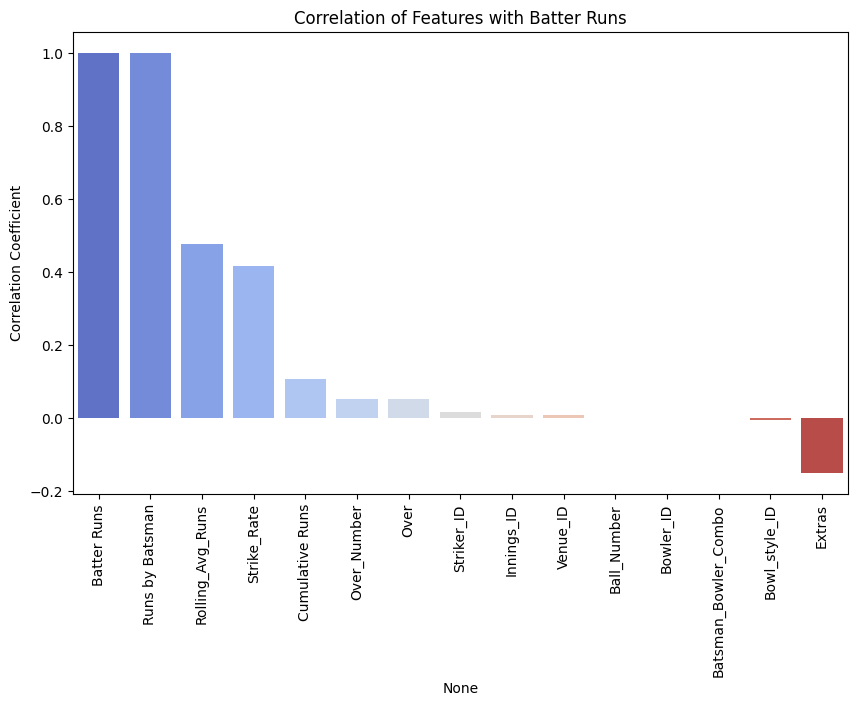

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=cm.index, y=cm.values, hue=cm.index, palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.ylabel("Correlation Coefficient")
plt.title("Correlation of Features with Batter Runs")
plt.show()

In [26]:
import ppscore as pps

In [31]:
y = ['Batter Runs']
x = [col for col in df.columns if col != 'Batter Runs']

In [33]:
pps_scores = {col: pps.score(df, col, 'Batter Runs')["ppscore"] for col in x}
pps_df = pd.DataFrame(pps_scores.items(), columns=['Feature', 'PPS'])
print(pps_df.sort_values(by="PPS", ascending= True))

                 Feature       PPS
0             Unnamed: 0  0.000000
21      Rolling_Avg_Runs  0.000000
20           Ball_Number  0.000000
19           Over_Number  0.000000
18         Bowl_style_ID  0.000000
17            Innings_ID  0.000000
16            Striker_ID  0.000000
15              Venue_ID  0.000000
14             Bowler_ID  0.000000
13         Bowling Style  0.000000
22  Batsman_Bowler_Combo  0.000000
11       Cumulative Runs  0.000000
9                 Bowler  0.000000
8            Non Striker  0.000000
7                Striker  0.000000
6                   Over  0.000000
5                Innings  0.000000
4              Match No.  0.000000
3                   Date  0.000000
2                  Venue  0.000000
1                     ID  0.000000
10                Extras  0.000000
23           Strike_Rate  0.000000
12       Runs by Batsman  0.999823
